In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


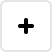
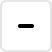
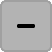
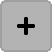
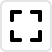
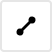
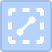
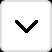
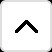
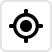


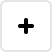
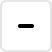
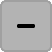
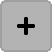
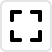
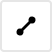
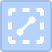
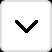
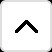
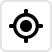

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data(n=100, seed=42):
    np.random.seed(seed)
    return pd.DataFrame({
        'x': np.random.choice(["A", "A", "A", "A", "B", "B", "B", "B", "C"], size=n),
        'y': np.random.normal(size=n),
        'g': np.random.choice(["+", "-"], size=n),
    })

In [4]:
from lets_plot.plot.geom import _geom

def geom_biboxplot(mapping=None, *, data=None, stat=None, position=None, show_legend=None, sampling=None, tooltips=None,
                   orientation=None,
                   fatten=None,
                   outlier_color=None, outlier_fill=None, outlier_shape=None, outlier_size=None, outlier_stroke=None,
                   varwidth=None,
                   whisker_width=None,
                   color_by=None, fill_by=None,
                   default_color=None,
                   **other_args):
    result = _geom('boxplot',
                   mapping=mapping,
                   data=data,
                   stat=stat,
                   position=position,
                   show_legend=show_legend,
                   sampling=sampling,
                   tooltips=tooltips,
                   orientation=orientation,
                   fatten=fatten,
                   varwidth=varwidth,
                   whisker_width=whisker_width,
                   color_by=color_by, fill_by=fill_by,
                   **other_args)
    if stat is None or stat == 'boxplot':
        result += _geom('point',
                        mapping=mapping,
                        data=data,
                        stat='boxplot_outlier',
                        position='dodge',
                        show_legend=show_legend,
                        sampling=sampling,
                        tooltips=tooltips,
                        orientation=orientation,
                        varwidth=varwidth,
                        color=outlier_color or default_color,
                        fill=outlier_fill,
                        shape=outlier_shape,
                        size=outlier_size,
                        stroke=outlier_stroke,
                        color_by=color_by, fill_by=fill_by)
    return result

In [5]:
ggplot(get_data(), aes('x', 'y')) + \
    geom_biboxplot()

In [6]:
ggplot(get_data(), aes('x', 'y')) + \
    geom_biboxplot(aes(fill='g'), color='white', size=1.5, \
                   outlier_shape=21, outlier_color='white', outlier_size=5, outlier_stroke=3) + \
    flavor_darcula()

In [7]:
ggplot(get_data(), aes('x', 'y')) + \
    geom_biboxplot(varwidth=True)

In [8]:
gggrid([
    ggplot(get_data(), aes('y', 'x')) + \
        geom_biboxplot(orientation='y') + \
        ggtitle("orientation='y'"),
    ggplot(get_data(), aes('x', 'y')) + \
        geom_biboxplot() + \
        coord_flip() + \
        ggtitle("coord_flip()"),
])

In [9]:
ggplot(get_data(), aes('x', 'y')) + \
    geom_biboxplot() + \
    facet_grid(x='g')